# Forecasting - ETH

1) Imports

In [1]:
import warnings
import requests
import json
import pandas as pd
from datetime import datetime, date
warnings.filterwarnings("ignore")
from ts_utils import *

2) Coleta de dados

In [2]:
hj = date.today()
futuro_day = date.fromordinal(hj.toordinal()+30) # hoje + 30 dias
print("Data Limite Previsão",futuro_day)

Data Limite Previsão 2021-06-27


In [3]:


# Pegando dados da Api
dtf = get_data('eth', sample_data=False)
# Convertendo timestamp para data
DS = []
for result in dtf['time']:
    DS.append(datetime.fromtimestamp(result))
dtf = pd.DataFrame([DS, dtf['close']]).T
dtf.head()


Buscando  todas  observações da moeda ETH
Dataset foi carregado! Formatando Dataset ...


,0,1
0,2010-07-16 21:00:00,0.0
1,2010-07-17 21:00:00,0.0
2,2010-07-18 21:00:00,0.0
3,2010-07-19 21:00:00,0.0
4,2010-07-20 21:00:00,0.0


In [4]:
dtf.columns = ['date', 'close']
ts = dtf.groupby("date")["close"].sum().rename("sales")
ts.tail()

date
2021-05-24 21:00:00    2707.49
2021-05-25 21:00:00    2888.94
2021-05-26 21:00:00    2742.48
2021-05-27 21:00:00    2412.36
2021-05-28 21:00:00    2451.42
Name: sales, dtype: float64

3) Analise de séries temporais

Numero de observações:  3970
Valor maximo: $ 4178.02
Valor minimo: $ 0.0


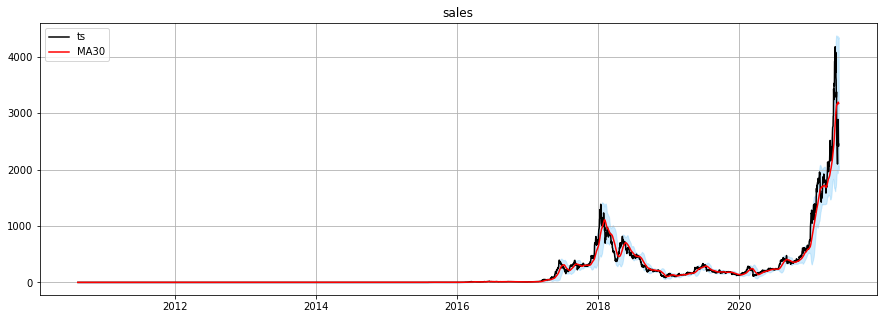

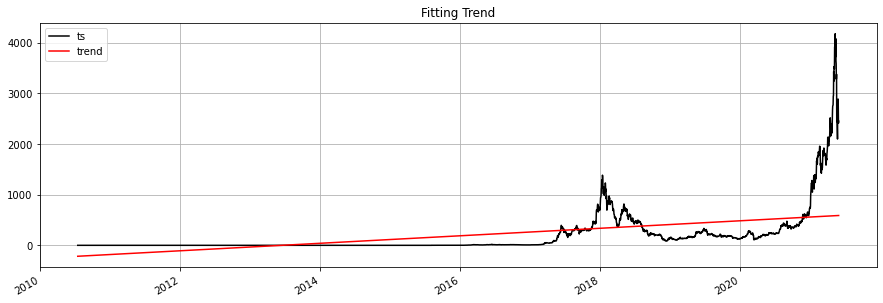

In [5]:
print("Numero de observações: ",len(ts))
print("Valor maximo: $",max(ts))
print("Valor minimo: $",min(ts))
w = 30
plot_ts(ts, plot_ma=True, plot_intervals=True, window=w, figsize=(15,5))
trend, line = fit_trend(ts, degree=1, plot=True, figsize=(15,5))

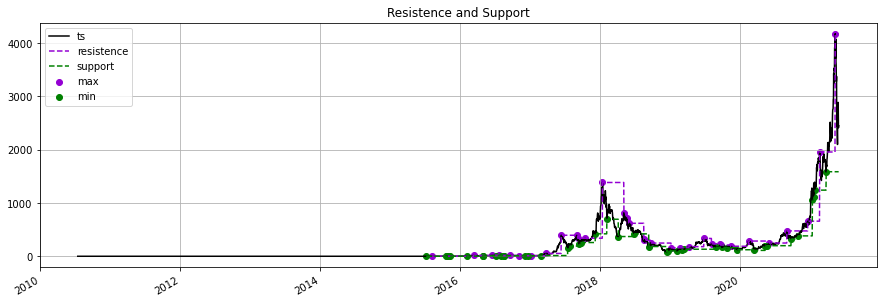

In [6]:
# Analise de maximos e minimos
res_sup = resistence_support(ts, window=30, trend=False, plot=True, figsize=(15,5))

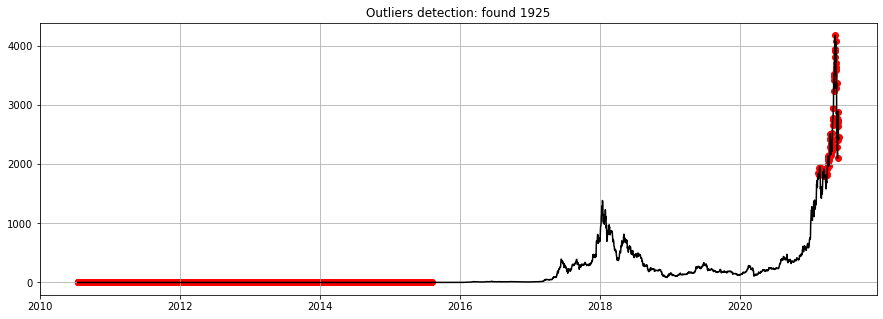

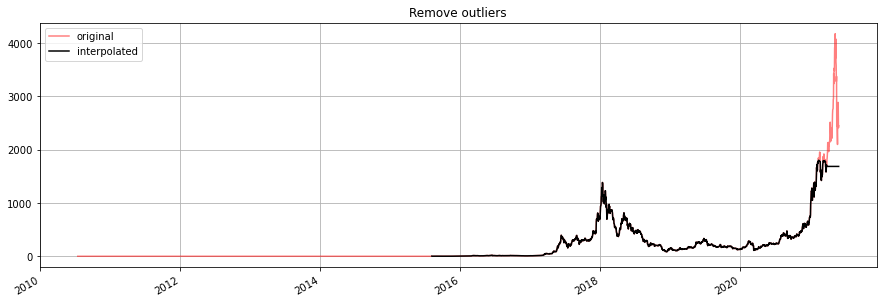

In [7]:
#Removendo outliers
dtf_outliers = find_outliers(ts, perc=0.05, figsize=(15,5))
ts_clean = remove_outliers(ts, outliers_idx=dtf_outliers[dtf_outliers["outlier"]==1].index, figsize=(15,5))

4) Processamento

--- splitting at index:  3930 | 2021-04-19 21:00:00 | test size: 0.01  ---


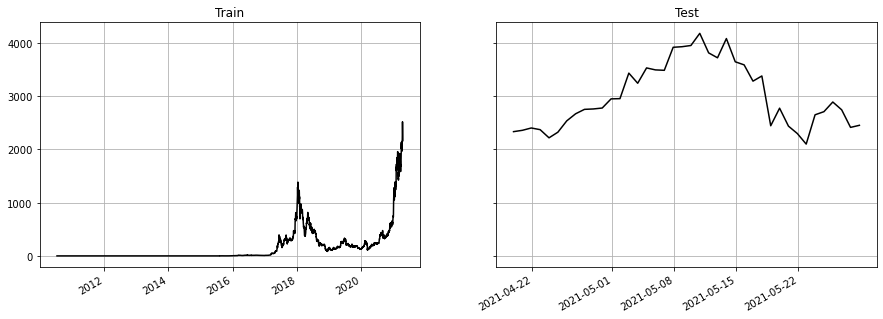

train: 3930 obs  |  test: 40 obs


In [8]:
ts_train, ts_test = split_train_test(ts, exog=None, test=0.01, plot=True, figsize=(15,5))
print("train:", len(ts_train), "obs  |  test:", len(ts_test), "obs")

5) Arima

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.

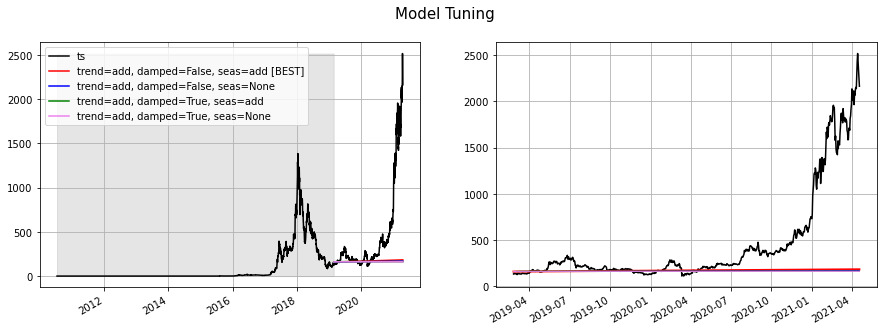

,combo,score,model
0,"trend=add, damped=False, seas=add",285.542836,<statsmodels.tsa.holtwinters.results.HoltWinte...
1,"trend=add, damped=False, seas=None",291.027792,<statsmodels.tsa.holtwinters.results.HoltWinte...
2,"trend=add, damped=True, seas=add",292.353336,<statsmodels.tsa.holtwinters.results.HoltWinte...
3,"trend=add, damped=True, seas=None",293.630270,<statsmodels.tsa.holtwinters.results.HoltWinte...
4,"trend=None, damped=False, seas=None",295.260589,<statsmodels.tsa.holtwinters.results.HoltWinte...


In [9]:
# Tuning
s=7
res = tune_expsmooth_model(ts_train, s=s, val_size=0.2, scoring=metrics.mean_absolute_error, top=4, figsize=(15,5))
res.head()

In [11]:
# Forecast unknown
#model = smt.ExponentialSmoothing(ts, trend="additive", damped=False, 
#                                 seasonal="multiplicative", seasonal_periods=s).fit(0.64)

#future = forecast_autoregressive(ts, model, end=futuro_day, conf=0.30, zoom=30, figsize=(15,5))

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.

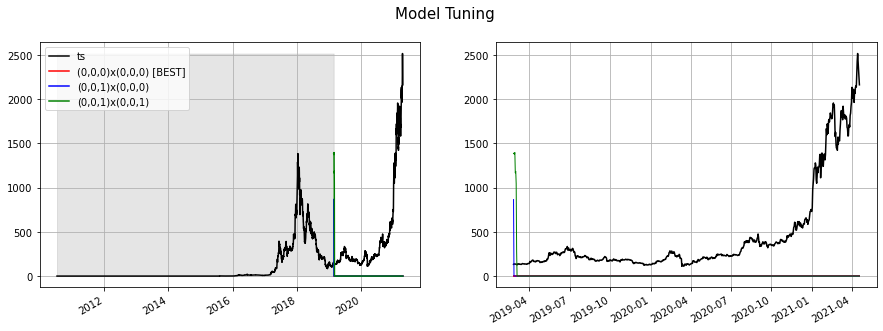

,combo,score,model
0,"(0,0,0)x(0,0,0)",447.658321,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
1,"(0,0,1)x(0,0,0)",448.420228,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
2,"(0,0,1)x(0,0,1)",456.652825,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
3,"(0,0,0)x(0,0,1)",457.983553,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
4,"(1,0,0)x(1,0,1)",1595.447022,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


In [12]:
# *pode demorar
res = tune_arima_model(ts_train, s=s, val_size=0.2, max_order=(1,1,1), seasonal_order=(1,0,1),
                        scoring=metrics.mean_absolute_error, top=3, figsize=(15,5))
res.head()

In [13]:
# *pode demorar
find_best_sarimax(ts_train, seasonal=True, stationary=False, s=s, exog=None,
                  max_p=10, max_d=3, max_q=10, 
                  max_P=1, max_D=1, max_Q=1)

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Tulio Caproni\Anacond

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3930
Model:             SARIMAX(3, 2, 3)x(1, 0, [1], 7)   Log Likelihood              -17275.104
Date:                             Fri, 28 May 2021   AIC                          34570.209
Time:                                     21:25:17   BIC                          34632.967
Sample:                                          0   HQIC                         34592.476
                                            - 3930                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.000      3.391      0.001       0.001       0.002
ar.L1         -0.6252      0.008    -79.415      0.000      -0.641      -0.610
ar.L2         -0.9492      0.005   -188.494      0.000      -0.959      -0.939
ar.L3          0.0341      0.005      6.684      0.000       0.024       0.044
ma.L1         -0.3607      0.006    -55.895      0.000      -0.373      -0.348
ma.L2          0.2964      0.007     41.861      0.000       0.283       0.310
ma.L3         -0.9344      0.005   -198.301      0.000      -0.944      -0.925
ar.S.L7        0.2551      0.051      4.956      0.000       0.154       0.356
ma.S.L7       -0.3455      0.051     -6.770      0.000      -0.446      -0.245
sigma2       383.5142      2.020    189.838      0.000     379.555     387.474
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            242996.69
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):           11863.45   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Trend parameters: d=1
Seasonal parameters: Seasonality every 7 observations
Exog parameters: Not given
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


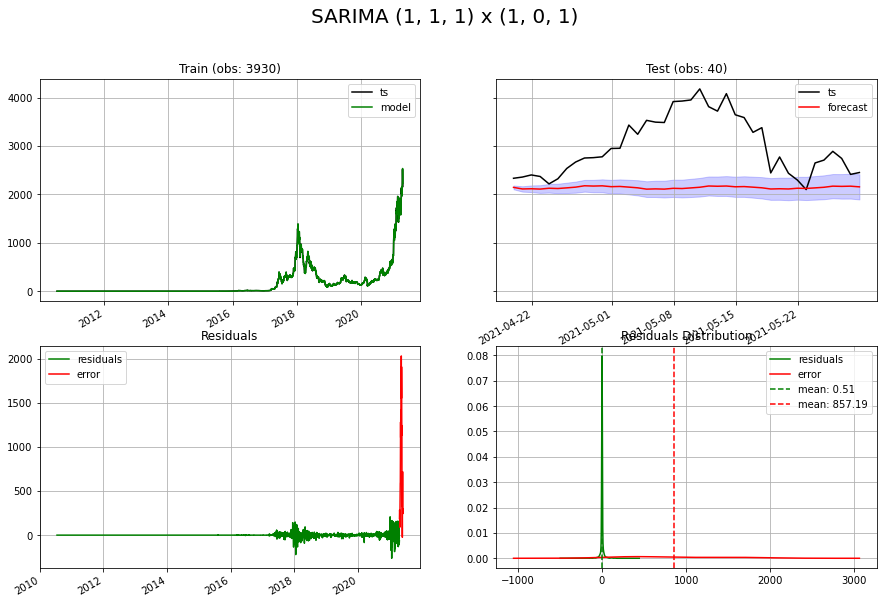

Training --> Residuals mean: 1.0  | std: 20.0
Test --> Error mean: 857.0  | std: 604.0  | mae: 858.0  | mape: 26.0 %  | mse: 1090486.0  | rmse: 1044.0


In [14]:
# Traino/Test
dtf, model = fit_sarimax(ts_train, ts_test, order=(1,1,1), seasonal_order=(1,0,1), s=s, conf=0.95, figsize=(15,10))

C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Tulio Caproni\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
--- generating index date --> start: 2021-05-29 21:00:00 | end: 2021-06-26 21:00:00 | len: 29 ---


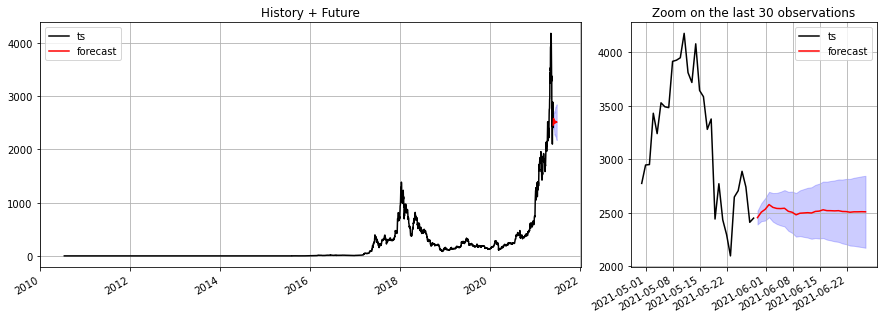

In [15]:
# previsão
model = smt.SARIMAX(ts, order=(1,1,1), seasonal_order=(1,0,1,s), exog=None).fit()

future = forecast_autoregressive(ts, model, end=futuro_day, conf=0.95, zoom=30, figsize=(15,5))

6) LSTM

In [16]:
s = 365
n_features = 1

In [17]:
model = models.Sequential()
model.add( layers.LSTM(input_shape=(s,n_features), units=50, activation='relu', return_sequences=True) )
model.add( layers.Dropout(0.2) )
model.add( layers.LSTM(units=50, activation='relu', return_sequences=False) )
model.add( layers.Dense(1) )
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 365, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 365, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dtf, model = fit_lstm(ts_train, ts_test, model, exog=None, s=s, epochs=100, conf=0.20, figsize=(15,10))

In [ ]:
future = forecast_lstm(ts, model, conf=0.20, end=futuro_day, freq="D", zoom=30, figsize=(15,5))

7) Prophet

In [18]:
# Crie dataframe com colunas 'ds' (datas), 'y' (valores), 'cap' (capacidade de crescimento = "logística")
dtf_train = ts_train.reset_index().rename(columns={"date":"ds", "sales":"y"})
dtf_test = ts_test.reset_index().rename(columns={"date":"ds", "sales":"y"})

dtf_train.tail()

,ds,y
3925,2021-04-14 21:00:00,2517.08
3926,2021-04-15 21:00:00,2425.96
3927,2021-04-16 21:00:00,2318.01
3928,2021-04-17 21:00:00,2240.96
3929,2021-04-18 21:00:00,2163.36


In [19]:
# Crie feriados dataFrame com as colunas 'ds' (datas) e 'feriado' (string ex 'xmas')
dtf_holidays = None

In [20]:
model = Prophet(growth="linear", changepoints=None, n_changepoints=25, seasonality_mode="multiplicative",
                yearly_seasonality="auto", weekly_seasonality="auto", daily_seasonality=False,
                holidays=dtf_holidays, interval_width=0.80)

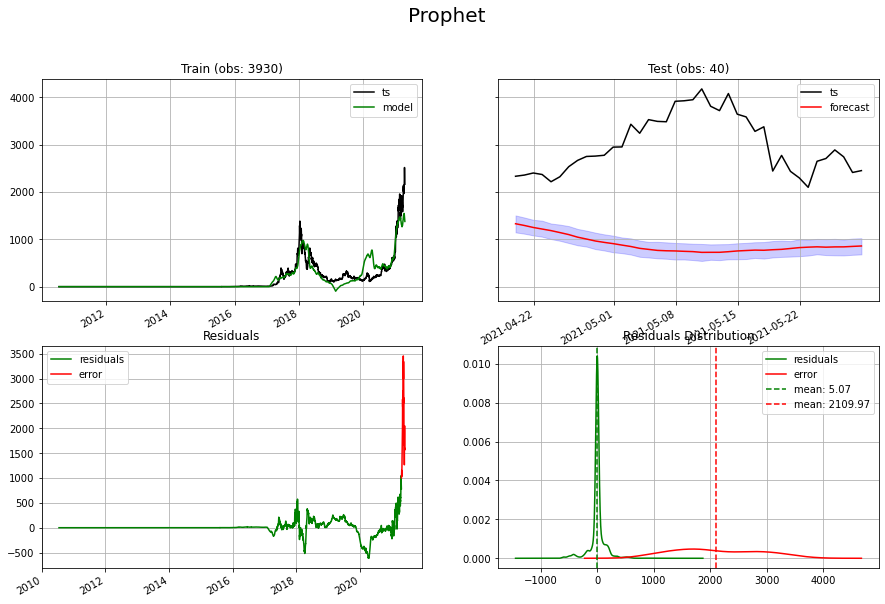

Training --> Residuals mean: 5.0  | std: 134.0
Test --> Error mean: 2110.0  | std: 735.0  | mae: 2110.0  | mape: 68.0 %  | mse: 4978076.0  | rmse: 2231.0


In [21]:
dtf, model = fit_prophet(dtf_train, dtf_test, model=model, freq="D", figsize=(15,10))

In [22]:
dtf = ts.reset_index().rename(columns={"date":"ds", "sales":"y"})
dtf.tail()

,ds,y
3965,2021-05-24 21:00:00,2707.49
3966,2021-05-25 21:00:00,2888.94
3967,2021-05-26 21:00:00,2742.48
3968,2021-05-27 21:00:00,2412.36
3969,2021-05-28 21:00:00,2451.42


In [23]:
model = Prophet(growth="linear", changepoints=None, n_changepoints=25, seasonality_mode="multiplicative",
                yearly_seasonality="auto", weekly_seasonality="auto", daily_seasonality=False,
                holidays=dtf_holidays, interval_width=0.80)

--- generating index date --> start: 2021-05-29 21:00:00 | end: 2021-06-26 21:00:00 | len: 29 ---


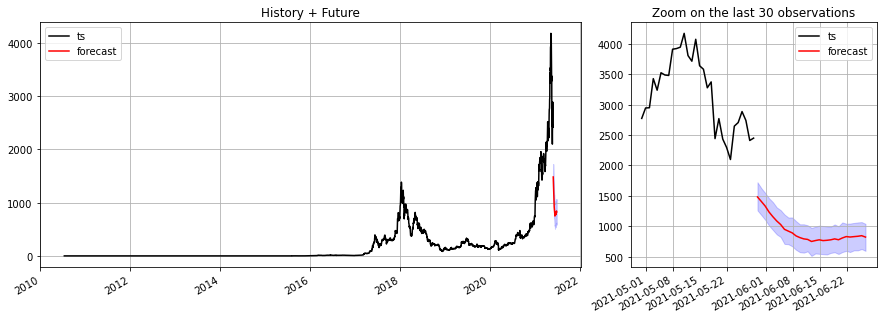

In [24]:
future = forecast_prophet(dtf, model, end=futuro_day, freq="D", zoom=30, figsize=(15,5))